This notebook will download and process the datasets mentioned in the project report.

In [1]:
# Import Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore") # ignore seaborn deprecation warnings 

In [2]:
# Import Data
data_dav = pd.read_csv('dav_heart_disease_dataset.csv')
data_sav = pd.read_csv('sve_cardio_dataset.csv', delimiter = ';')

# data_dav column descriptions
| Key | value |
|:---------|:-----------|
|age      | age in years  |
|sex      |  0 = female 1 = male  |
|cp       | chest pain type (4 intensities)  |
|trestbps | resting blood pressure  |
|chol     | serum cholestoral in mg/dl  |
|fbs      | fasting blood sugar > 120 mg/dl  |
|restecg  | resting electrocardiographic results (values 0,1,2)  |
|thalach  | maximum heart rate achieved  |
|exang    | exercise induced angina  |
|oldpeak  | ST depression induced by exercise relative to rest  |
|slope    | slope of the peak exercise ST segment  |
|ca       | number of major vessels (0-3) colored by flourosopy  |
|thal     | 0 = normal; 1 = fixed defect; 2 = reversable defect  |
|target   | 1 = has 0 = none  |

In [3]:
print(data_dav.info())
data_dav.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# data_sav column descriptions
| Key | value |
|:---------|:-----------|
|age| days |
|gender| 1 = female 2 = male |
|height | cm |
|weight | kg |
|ap_hi|Systolic blood pressure |
|ap_lo|Diastolic blood pressure |
|cholesterol | 1 = normal, 2 = above normal, 3 = well above normal |
|gluc | glucose levels 1 = normal, 2 = above normal, 3 = well above normal |
|smoke | do they smoke 1 = yes 0 = no |
|alco| Drink Alcohol 1 = yes 0 = no |
|active|Do Physical activity 1 = yes 0 = no |
|cardio | target 1 = yes 0 = no |

In [4]:
print(data_sav.info())
data_sav.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
None


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
# Normalize data
data_sav['gender'] = data_sav['gender'] - 1 # match gender to data_dav
data_sav['age'] = data_sav['age'] / 365 # match age to data_dav units

# Normalize to 0-2 cholesterol level scale
# Conditionals based on https://www.webmd.com/cholesterol-management/understanding-your-cholesterol-report
data_dav.loc[(data_dav.chol < 200),'chol']=0
data_dav.loc[(data_dav.chol >= 240),'chol']=2
data_dav.loc[(data_dav.chol >= 200),'chol']=1

data_sav.loc[(data_sav.cholesterol == 1),'cholesterol']=0
data_sav.loc[(data_sav.cholesterol == 2),'cholesterol']=1
data_sav.loc[(data_sav.cholesterol == 3),'cholesterol']=2


dav_set


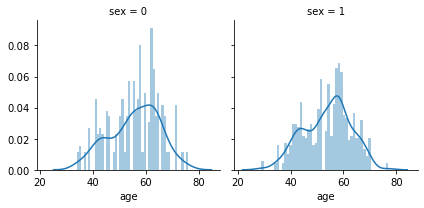

sav_set


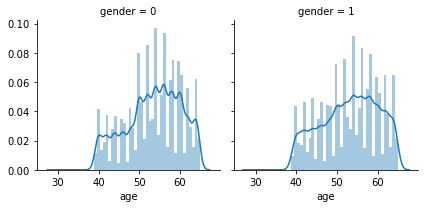

In [6]:
# Analyse gender for data spread
print("dav_set")
g = sns.FacetGrid(data_dav, col = "sex")
g.map(sns.distplot, "age", bins = 50)
plt.show()

print("sav_set")
g = sns.FacetGrid(data_sav, col = "gender")
g.map(sns.distplot, "age", bins = 50)
plt.show()

dav_set


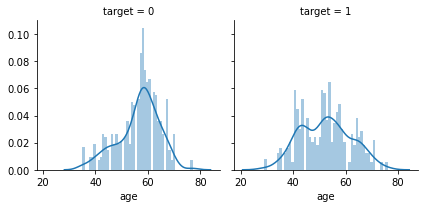

sav_set


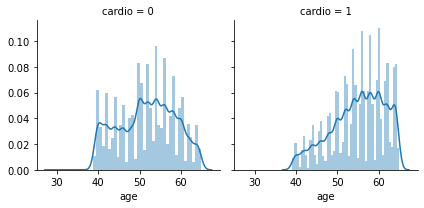

In [7]:
# Analyse target vs age distribution
print("dav_set")
g = sns.FacetGrid(data_dav, col = "target")
g.map(sns.distplot, "age", bins = 50)
plt.show()

print("sav_set")
g = sns.FacetGrid(data_sav, col = "cardio")
g.map(sns.distplot, "age", bins = 50)
plt.show()

dav_set


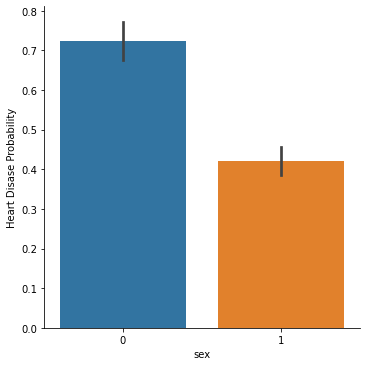

sav_set


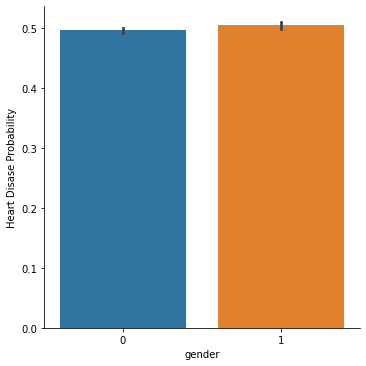

In [8]:
# Analyse target vs gender
print("dav_set")
g = sns.factorplot(x = "sex", y = "target", data = data_dav, kind = "bar",size=5)
g.set_ylabels("Heart Disase Probability")
g.set_xlabels("sex")
plt.show()

print("sav_set")
g = sns.factorplot(x = "gender", y = "cardio", data = data_sav, kind = "bar",size=5)
g.set_ylabels("Heart Disase Probability")
g.set_xlabels("gender")
plt.show()

dav_set


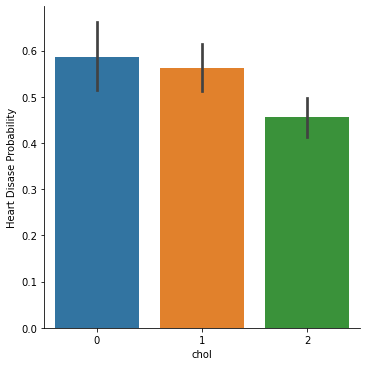

sav_set


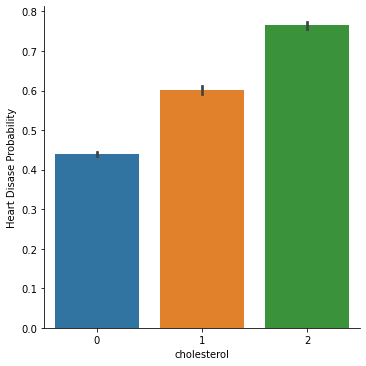

In [9]:
# Analyse target vs cholesterol
print("dav_set")
g = sns.factorplot(x = "chol", y = "target", data = data_dav, kind = "bar",size=5)
g.set_ylabels("Heart Disase Probability")
g.set_xlabels("chol")
plt.show()

print("sav_set")
g = sns.factorplot(x = "cholesterol", y = "cardio", data = data_sav, kind = "bar",size=5)
g.set_ylabels("Heart Disase Probability")
g.set_xlabels("cholesterol")
plt.show()

dav_set


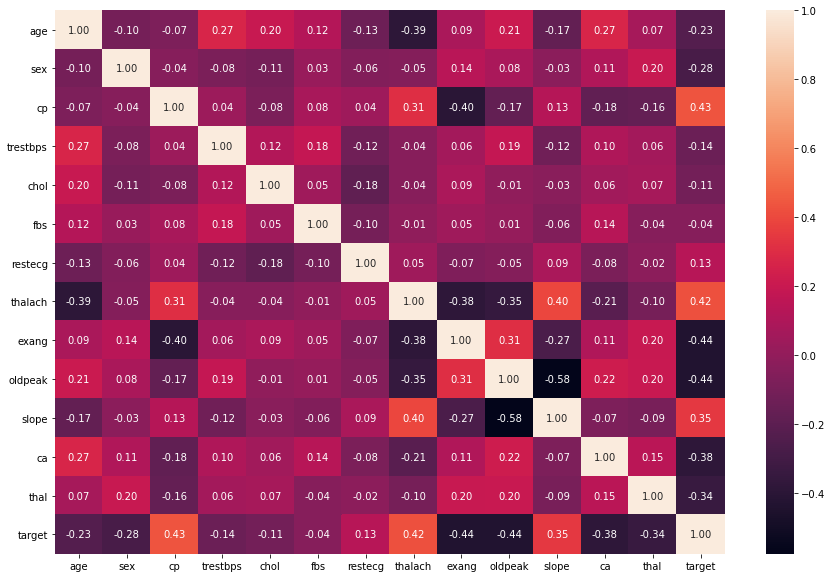

sav_set


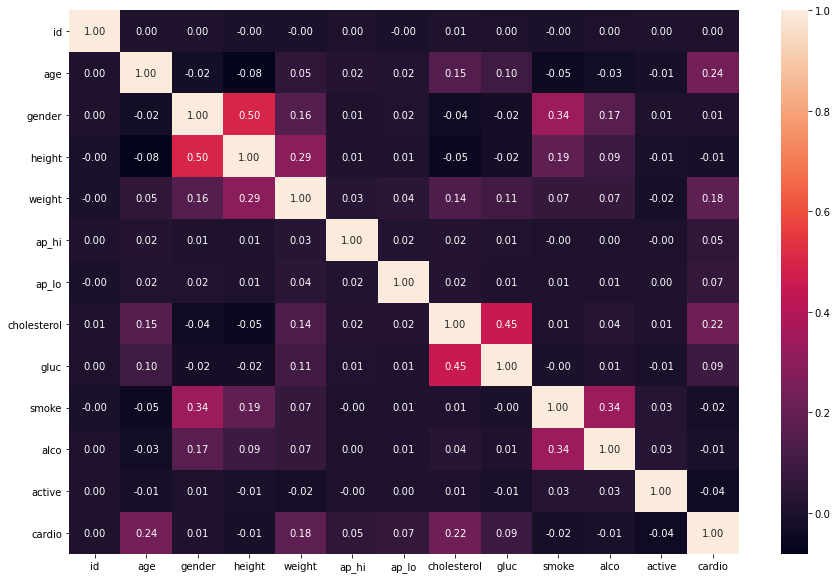

In [10]:
# Check for correlation
print("dav_set")
plt.figure(figsize=(15,10))
sns.heatmap(data_dav.corr(), annot = True, fmt = ".2f")
plt.show()

print("sav_set")
plt.figure(figsize=(15,10))
sns.heatmap(data_sav.corr(), annot = True, fmt = ".2f")
plt.show()